In [43]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd
from PIL import Image

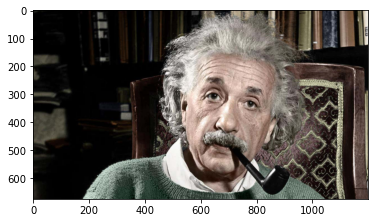

In [44]:
image=np.asarray(Image.open('einstein.jpg'))
plt.imshow(image)
plt.show()

In [45]:
def compress_image(img,k):
    # splitting the array into three 2D array (svd only apply on 2D array)
    r = img[:,:,0]  # array for R
    g = img[:,:,1]  # array for G
    b = img[:,:,2]  # array for B
    
    # Calculating the svd components for all three arrays
    ur,sr,vr = svd(r, full_matrices=False)
    ug,sg,vg = svd(g, full_matrices=False)
    ub,sb,vb = svd(b, full_matrices=False)
    
    # Forming the compress image with reduced information
    # We are selecting only k singular values for each array to make image which will exclude some information from the 
    # image while image will be of same dimension
    
    # ur (mxk), diag(sr) (kxk) and vr (kxn) if image is off (mxn)
    # so let suppose we only selecting the k1 singular value from diag(sr) to form image
    
    rr = np.dot(ur[:,:k],np.dot(np.diag(sr[:k]), vr[:k,:]))
    rg = np.dot(ug[:,:k],np.dot(np.diag(sg[:k]), vg[:k,:]))
    rb = np.dot(ub[:,:k],np.dot(np.diag(sb[:k]), vb[:k,:]))
    
    # Creating a array of zeroes; shape will be same as of image matrix
    rimg = np.zeros(img.shape)
    
    # Adding matrix for R, G & B in created array
    rimg[:,:,0] = rr
    rimg[:,:,1] = rg
    rimg[:,:,2] = rb
    
    # It will check if any value will be less than 0 will be converted to its absolute
    # and, if any value is greater than 255 than it will be converted to 255
    # because in image array of unit8 can only have value between 0 & 255
    for ind1, row in enumerate(rimg):
        for ind2, col in enumerate(row):
            for ind3, value in enumerate(col):
                if value < 0:
                    rimg[ind1,ind2,ind3] = abs(value)
                if value > 255:
                    rimg[ind1,ind2,ind3] = 255

    # converting the compress image array to uint8 type for further conversion into image object
    compressed_image = rimg.astype(np.uint8)
    
    # Showing the compressed image in graph
    plt.imshow(compressed_image)
    plt.show()
    
    # Uncomment below code if you want to save your compressed image to the file
    #compressed_image = Image.fromarray(compressed_image)
    #compressed_image.save("image_name.jpg")

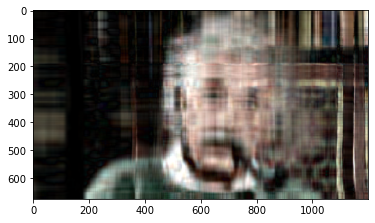

In [46]:
compress_image(image, 10) # Compressing images only having 10 singular values